# ML Project
<br> Apply ML algorithms to the "wine" dataset

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

## Data, exploration, preprocessing and visualisation

In [3]:
df = pd.read_csv("wine.data", header = None) #[https://archive.ics.uci.edu/ml/datasets/wine]

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [6]:
df = df.dropna()  # Delete Nan values

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# To assign column names based on data descrptions
df.columns = ["labels", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
              "Nonflavanoid phenols", "Proanthocyanins", 
              "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [9]:
df

,labels,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
df.dtypes

labels                            int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [11]:
avr_alcohol = df['Alcohol'].mean()
avr_alcohol

13.000617977528083

In [12]:
df.describe() # to have a look at the details

,labels,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
df["labels"].shape

(178,)

In [14]:
# number of classes:
pd.unique(df['labels']) #--> 3

array([1, 2, 3])

In [15]:
df['labels'].value_counts()

2    71
1    59
3    48
Name: labels, dtype: int64

In [16]:
df["Proanthocyanins"].shape

(178,)

In [17]:
#df.groupby('Color intensity').count()

array([[<AxesSubplot:title={'center':'labels'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity of ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoid phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>,
        <AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

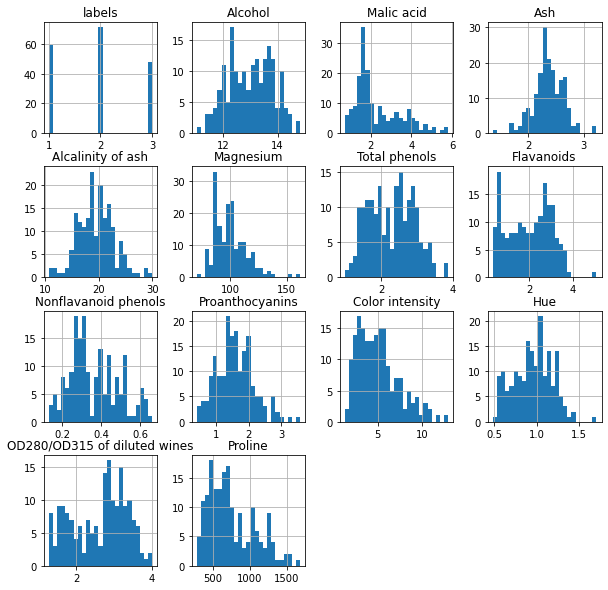

In [18]:
df.hist(bins=25,figsize=(10,10))  # draw hostograms for each of the features + label culumn

#### Distribution of classes

In [19]:
len(df[df['labels'] == 1])

59

In [20]:
len(df[df['labels'] == 3])

48

In [21]:
len(df[df['labels'] == 2])

71

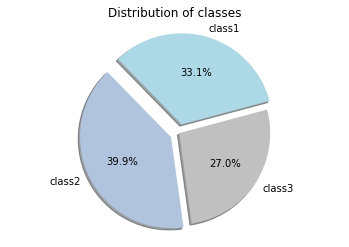

In [22]:
lenghts = [len(df[df["labels"] == 1]), len(df[df["labels"] == 2]), len(df[df["labels"] == 3])]

my_labels = 'class1','class2', 'class3'
my_explode = (0.1, 0.1, 0)
my_colors = ['lightblue','lightsteelblue','silver']
plt.pie(lenghts,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Distribution of classes')
plt.axis('equal')
plt.show()

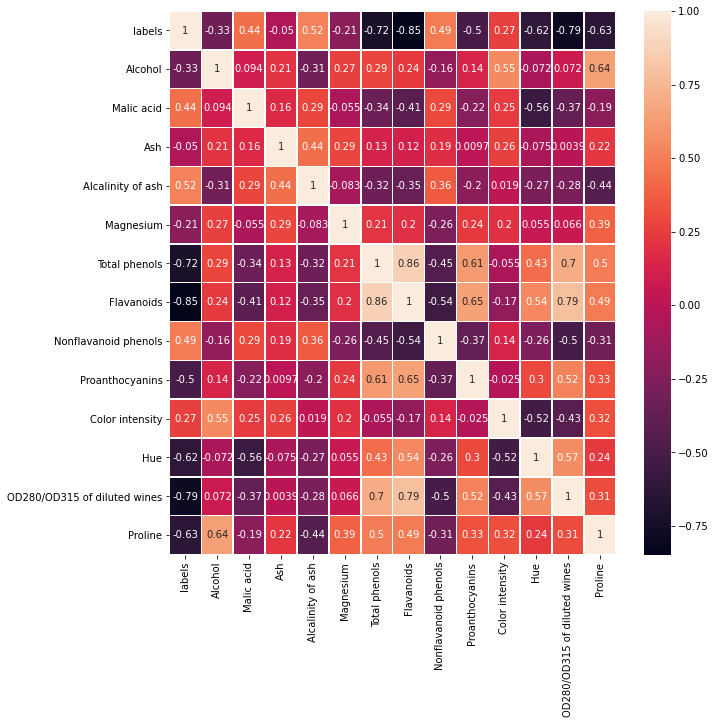

In [23]:
# The plot shows the corrolation between features
# for example, the corrolation between Alcohol and Malic acid is 0.094.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

In [24]:
corr_matrix['Alcohol'].sort_values(ascending=False)   # Corrolation between alcohol and Proline is the highest

Alcohol                         1.000000
Proline                         0.643720
Color intensity                 0.546364
Total phenols                   0.289101
Magnesium                       0.270798
Flavanoids                      0.236815
Ash                             0.211545
Proanthocyanins                 0.136698
Malic acid                      0.094397
OD280/OD315 of diluted wines    0.072343
Hue                            -0.071747
Nonflavanoid phenols           -0.155929
Alcalinity of ash              -0.310235
labels                         -0.328222
Name: Alcohol, dtype: float64

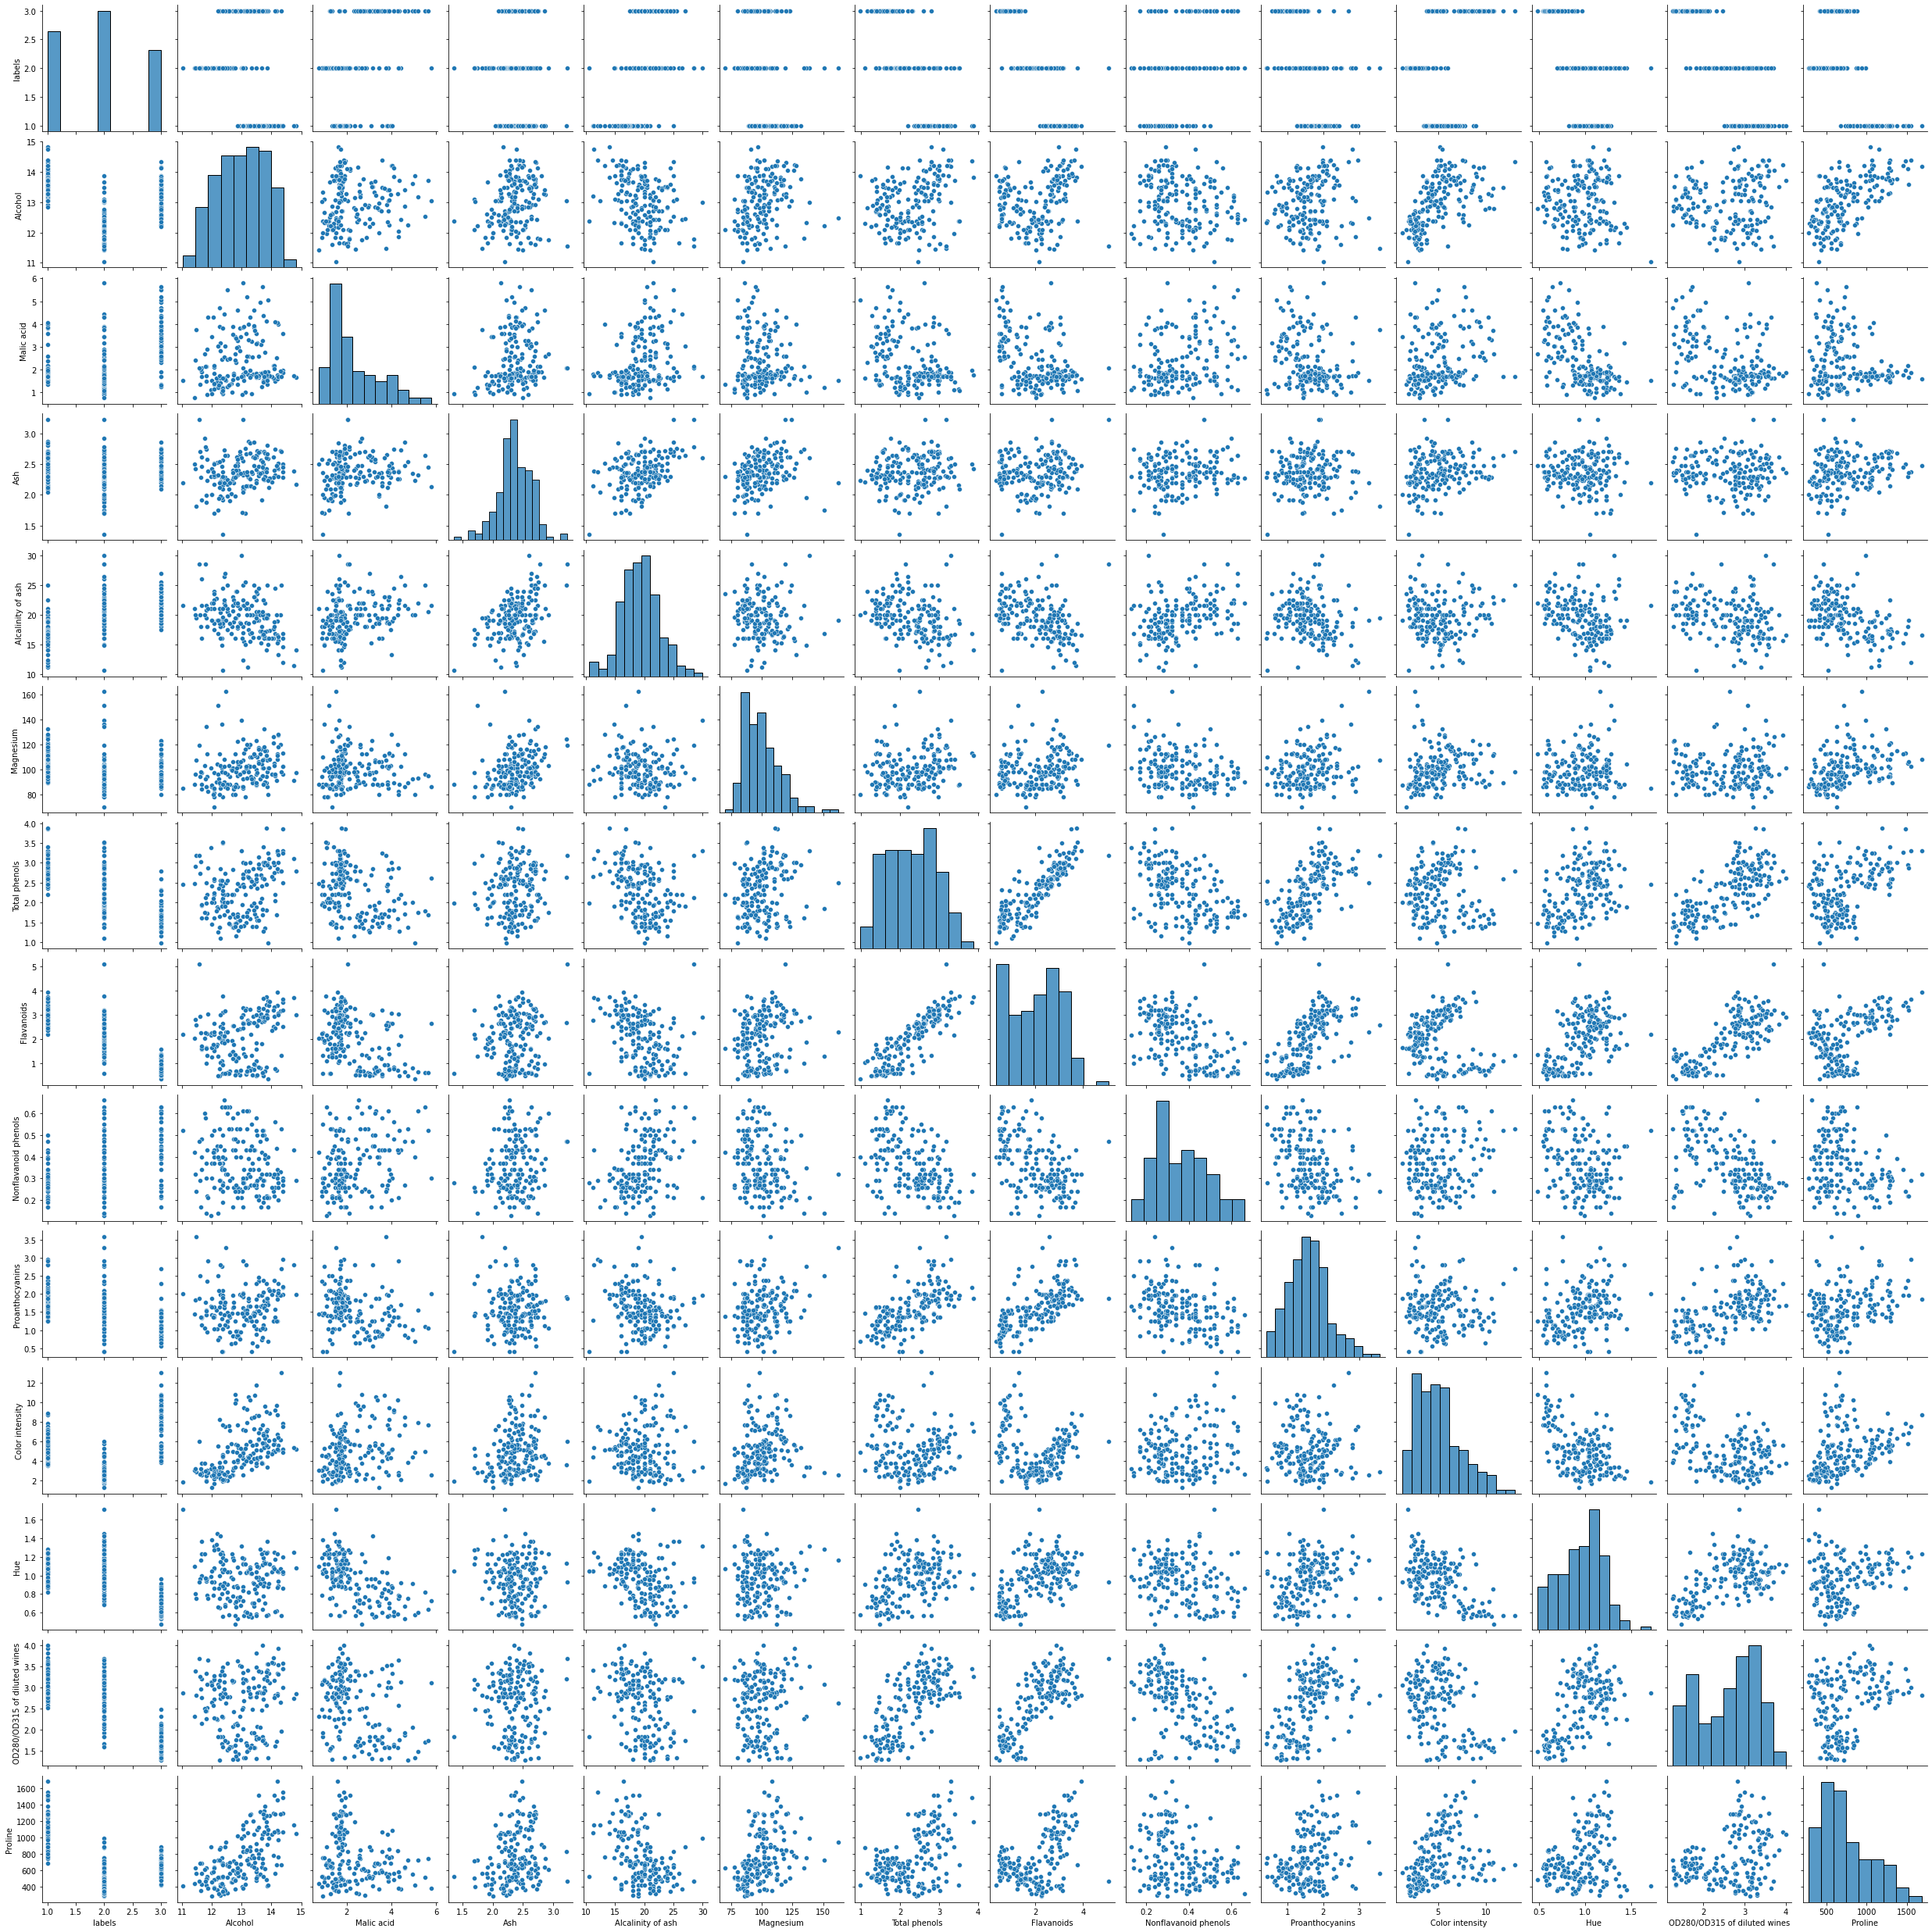

In [25]:
import seaborn as sns  #the plot below shows the lineraity between features, most of them they don"t have linearity
#[https://seaborn.pydata.org/generated/seaborn.pairplot.html]
sns.pairplot(df)

### X and y

In [26]:
X = df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
              "Nonflavanoid phenols", "Proanthocyanins", 
              "Color intensity", "Proline"]]

In [27]:
X.shape

(178, 11)

In [28]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,735
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,840


In [29]:
y = df[["labels"]]#label

In [30]:
y.shape

(178, 1)

In [31]:
type(y)

pandas.core.frame.DataFrame

In [32]:
type(np.array(y))

numpy.ndarray

In [33]:
len(np.array(y)==0)

178

In [34]:
np.array(y).shape

(178, 1)

In [35]:
print("Number of samples: ", y.shape[0])

Number of samples:  178


In [36]:
l = np.unique(y)
l

array([1, 2, 3])

In [37]:
len(X)

178

In [38]:
len(y)

178

##### Visualize the variables alcohol and magnesium in a scatter plot:

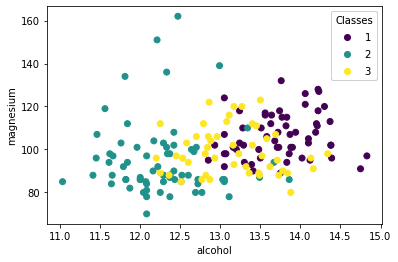

In [39]:
fig, ax = plt.subplots()
scatter = plt.scatter(df["Alcohol"], df["Magnesium"], c =np.array(y))

plt.xlabel("alcohol")
plt.ylabel("magnesium")

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

# [https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html]

##### Visualize the variables alcohol and proline in a scatter plot:

In [40]:
class_1_a = df[df["labels"] == 1]['Alcohol']
class_2_a = df[df["labels"] == 2]['Alcohol']
class_3_a = df[df["labels"] == 3]['Alcohol']

In [41]:
class_1_p = df[df["labels"] == 1]["Proline"]
class_2_p = df[df["labels"] == 2]["Proline"]
class_3_p = df[df["labels"] == 3]["Proline"]

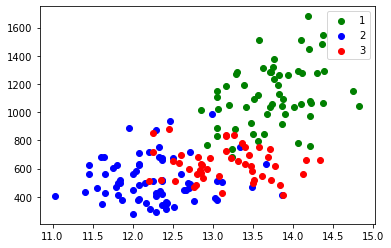

In [42]:
plt.scatter(class_1_a, class_1_p,  label = '1', color= 'green')
plt.scatter(class_2_a, class_2_p,  label = '2', color= 'blue')
plt.scatter(class_3_a, class_3_p, label = "3", color= 'red')
plt.legend()
plt.show()

## train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)  

## Classifiers

### DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree1 = DecisionTreeClassifier (max_depth = 5) 

In [46]:
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
dtree1.predict(X_test.iloc[33].values.reshape(1, -1))

array([1])

In [48]:
dtree1.score(X_test, y_test)

0.9444444444444444

In [49]:
preds = dtree1.predict(X_test) #predictions
preds

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3])

In [50]:
len(preds)

72

In [51]:
confusion_matrix(y_test, preds)

array([[23,  3,  0],
       [ 0, 27,  0],
       [ 1,  0, 18]])

Model accuracy is:  0.9433962264150944
Model accuracy is:  0.9444444444444444
Model precision is:  0.9
Macro f1 score is :  0.9467804646752015
Micro f1 score is :  0.9444444444444444
Weihted f1 score is :  0.9442421368737158


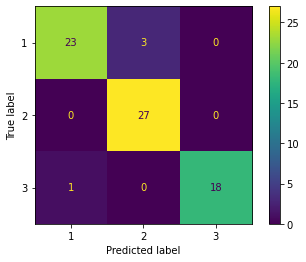

In [52]:
confusion = metrics.confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


#Accuracy :
print("Model accuracy is: ", (TP + TN) / (TP + TN + FP + FN))
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds))

#Precision
print("Model precision is: ", TP / (TP + FP))

# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds, average='weighted'))
plot_confusion_matrix(dtree1, X_test, y_test)  
plt.show()

In [53]:
print("\nClassification report: \n" + str(classification_report(y_test, preds)))


Classification report: 
              precision    recall  f1-score   support

           1       0.96      0.88      0.92        26
           2       0.90      1.00      0.95        27
           3       1.00      0.95      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.95      0.94      0.94        72



#### Cross_validatation on desicion tree

In [54]:
reslut = cross_validate(dtree1, X,y, cv =3)
reslut

{'fit_time': array([0.00471711, 0.00412869, 0.00467014]),
 'score_time': array([0.00238204, 0.00190806, 0.00253725]),
 'test_score': array([0.95      , 0.83050847, 0.93220339])}

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier 

In [56]:
forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4) 

In [57]:
forest.fit(X_train, y_train)

<ipython-input-57-e0147d7dbc7c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, n_jobs=4)

In [58]:
forest.score(X_test, y_test)

0.9722222222222222

In [59]:
preds4 = forest.predict(X_test)
preds4

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3])

In [60]:
confusion_matrix(y_test, preds4)

array([[26,  0,  0],
       [ 1, 26,  0],
       [ 0,  1, 18]])

In [61]:
print("\nClassification report: \n" + str(classification_report(y_test, preds4)))


Classification report: 
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       0.96      0.96      0.96        27
           3       1.00      0.95      0.97        19

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [62]:
#Accuracy :
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds4))


# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds4, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds4, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds4, average='weighted'))

Model accuracy is:  0.9722222222222222
Macro f1 score is :  0.9723560038025448
Micro f1 score is :  0.9722222222222222
Weihted f1 score is :  0.9721655617882033


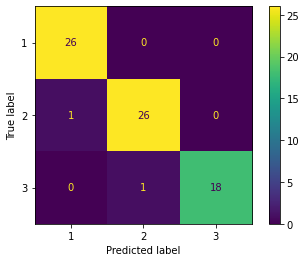

In [63]:
plot_confusion_matrix(forest, X_test, y_test)  
plt.show()

### SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()

In [66]:
svc.fit(X_train, y_train)

/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [67]:
svc.score(X_test, y_test)  

0.6527777777777778

In [68]:
preds3 = svc.predict(X_test)
preds3

array([3, 1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2, 3,
       2, 1, 3, 2, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1,
       1, 1, 3, 1, 1, 2])

In [69]:
confusion_matrix(y_test, preds3) 

array([[23,  0,  3],
       [ 1, 17,  9],
       [ 1, 11,  7]])

In [70]:
len(y_test)

72

In [71]:
#Accuracy :
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds3))


# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds3, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds3, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds3, average='weighted'))

Model accuracy is:  0.6527777777777778
Macro f1 score is :  0.6295212183757076
Micro f1 score is :  0.6527777777777778
Weihted f1 score is :  0.6547484650425827


In [72]:
print("\nClassification report: \n" + str(classification_report(y_test, preds3)))


Classification report: 
              precision    recall  f1-score   support

           1       0.92      0.88      0.90        26
           2       0.61      0.63      0.62        27
           3       0.37      0.37      0.37        19

    accuracy                           0.65        72
   macro avg       0.63      0.63      0.63        72
weighted avg       0.66      0.65      0.65        72



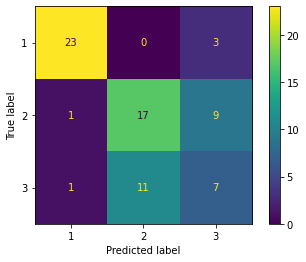

In [73]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [76]:
knn2 = KNeighborsClassifier(n_neighbors = 3)

In [77]:
knn3 = KNeighborsClassifier(n_neighbors = 10)

In [78]:
knn.fit(X_train, y_train)

<ipython-input-78-144fd69ce732>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [79]:
knn2.fit(X_train, y_train)

<ipython-input-79-28c27cb34451>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [80]:
knn3.fit(X_train, y_train)

<ipython-input-80-7df96cd19d1b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn3.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [81]:
knn.predict(X_test.iloc[44].values.reshape(1, -1))

array([2])

In [82]:
knn.score(X_test, y_test)

0.6666666666666666

In [83]:
knn2.score(X_test, y_test)

0.6666666666666666

In [84]:
knn3.score(X_test, y_test)

0.6805555555555556

In [85]:
preds2 = knn.predict(X_test) #predictions
preds2

array([3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 1,
       2, 1, 3, 2, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 2, 3, 3, 1, 1,
       1, 3, 3, 1, 1, 2])

In [86]:
preds6 = knn2.predict(X_test) #predictions
preds6

array([3, 1, 3, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 3,
       3, 1, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1,
       1, 3, 3, 1, 1, 2])

In [87]:
preds7 = knn3.predict(X_test) #predictions
preds7

array([1, 1, 2, 1, 2, 1, 3, 3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2,
       3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3,
       3, 1, 3, 2, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1,
       1, 1, 3, 1, 1, 2])

In [88]:
confusion_matrix(y_test, preds2)

array([[23,  0,  3],
       [ 3, 17,  7],
       [ 1, 10,  8]])

In [89]:
#Accuracy :
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds2))

# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds2, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds2, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds2, average='weighted'))

Model accuracy is:  0.6666666666666666
Macro f1 score is :  0.6433288634546496
Micro f1 score is :  0.6666666666666666
Weihted f1 score is :  0.6636424160009066


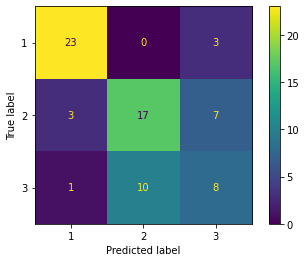

In [90]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [91]:
print("Macro f1 score is : ", f1_score(y_test, preds7, average='macro'))

Macro f1 score is :  0.6571119356833642


In [92]:
print("Macro f1 score is : ", f1_score(y_test, preds6, average='macro'))

Macro f1 score is :  0.6476035784211884


In [93]:
print("Macro f1 score is : ", f1_score(y_test, preds2, average='macro'))

Macro f1 score is :  0.6433288634546496


In [94]:
from sklearn.model_selection import cross_val_score

#10-fold cross-validation with K=5 for KN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.66666667 0.66666667 0.61111111 0.61111111 0.61111111 0.61111111
 0.72222222 0.66666667 0.82352941 0.76470588]


/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConv

In [95]:
len(y_test)

72

In [96]:
df2 = y_test

In [97]:
y_test_as_array = df2['labels'].to_numpy()

In [98]:
np.array(y_test).T

array([[1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
        2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
        3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
        1, 3, 1, 1, 2, 3]])

In [99]:
len(np.array(y_test).T)

1

In [100]:
results = pd.DataFrame({'true_labels': y_test_as_array, 'knn_pred': preds2, 'dtree_pred': preds, 'SVC_pred': preds3, 'forst_pred': preds4})
results.head(10)

,true_labels,knn_pred,dtree_pred,SVC_pred,forst_pred
0,1,3,1,3,1
1,1,1,1,1,1
2,3,2,3,2,3
3,1,1,1,1,1
4,2,2,2,2,2
5,1,1,1,1,1
6,2,2,2,2,2
7,3,3,3,3,3
8,2,3,2,3,2
9,3,1,3,3,3


### Normalization  and apply SVM and KNN 

In [101]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [102]:
normalized_df

,labels,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [103]:
X2 = normalized_df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
              "Nonflavanoid phenols", "Proanthocyanins", 
              "Color intensity", "Proline"]]

In [104]:
y2 = normalized_df[["labels"]]#label

In [105]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.4, random_state = 42)  

In [106]:
svc.fit(X2_train, y_train)

/home/elaheh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [107]:
svc.score(X2_test, y_test) 

0.9861111111111112

In [108]:
preds5 = svc.predict(X2_test)
preds5

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3])

In [109]:
#Accuracy :
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds5))


# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds5, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds5, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds5, average='weighted'))

Model accuracy is:  0.9861111111111112
Macro f1 score is :  0.9849303849303851
Micro f1 score is :  0.9861111111111112
Weihted f1 score is :  0.9860496860496861


In [110]:
knn.fit(X2_train, y_train)

<ipython-input-110-e7e9cfd8ac50>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X2_train, y_train)


KNeighborsClassifier()

In [111]:
knn.score(X2_test, y_test) 

0.9861111111111112

In [112]:
preds8 = knn.predict(X2_test)
preds8

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 1, 3])

In [113]:
#Accuracy :
print("Model accuracy is: ", metrics.accuracy_score(y_test, preds5))


# Different F1 score
print("Macro f1 score is : ", f1_score(y_test, preds8, average='macro'))
print("Micro f1 score is : ", f1_score(y_test, preds8, average='micro'))
print("Weihted f1 score is : ", f1_score(y_test, preds8, average='weighted'))

Model accuracy is:  0.9861111111111112
Macro f1 score is :  0.9874213836477987
Micro f1 score is :  0.9861111111111112
Weihted f1 score is :  0.9861111111111112
